# Spaceship Titanic - Kaggle competition
## Reloaded

https://www.kaggle.com/competitions/spaceship-titanic

This notebook serves as an introduction for the class about ensemble models.
Students are introduced to RandomForest, AdaBoost, Gradient Boosting, XGBoost, LightGBM

In [1]:
# pip install Pandas

We load the train data. The PassengerId column is used as the index of the dataframe

In [2]:
import pandas as pd
import numpy as np

train = pd.read_csv("Data/train.csv", index_col= "PassengerId")
train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


## Preprocessing Pipeline

We identified null values in all columns. We will clean these by type.

In [4]:
train.isna().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [5]:
# pip install scikit-learn

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

train = pd.read_csv("Data/train.csv", index_col= "PassengerId")

# Step 1: Define transformers for different column types
numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="mean"))]
)

categorical_cols = ['HomePlanet', 'Destination', 'VIP', 'CryoSleep']
categorical_transformer = Pipeline(
    steps=[
        ('encoder', OneHotEncoder())
])

# Step 2: Create a ColumnTransformer that applies the transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='drop' 
)

# Step 3: Assemble the preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Fit and transform the DataFrame
X_train = preprocessing_pipeline.fit_transform(train)

preprocessing_pipeline


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Age', 'RoomService',
                                                   'FoodCourt', 'ShoppingMall',
                                                   'Spa', 'VRDeck']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['HomePlanet', 'Destination',
                                                   'VIP', 'CryoSleep'])]))])

In [7]:
# Converting back to Pandas DataFrame
onehot_encoder_feature_names = list(preprocessing_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['encoder'].get_feature_names_out())
column_order =  numerical_cols + onehot_encoder_feature_names

# Show the cleaned DataFrame
pd.DataFrame(X_train, columns=column_order, index=train.index)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_nan,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_nan,VIP_False,VIP_True,VIP_nan,CryoSleep_False,CryoSleep_True,CryoSleep_nan
PassengerId,,,,,,,,,,,,,,,,,,,,
0001_01,39.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
0002_01,24.0,109.0,9.0,25.0,549.0,44.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
0004_01,16.0,303.0,70.0,151.0,565.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,41.0,0.0,6819.0,0.0,1643.0,74.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9278_01,18.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9279_01,26.0,0.0,0.0,1872.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Random Forest Classifier

We extend the pipeline with a random forest classifier to predict the Transported variable.

In [8]:
from sklearn.ensemble import RandomForestClassifier

X = train.drop('Transported', axis=1)
y = train['Transported']

# Define the hyperparameters for the DecisionTreeClassifier
hyperparams = {
    'n_estimators': 1000,       # Number of trees in the forest
    'bootstrap': True,          # Bootstrap samples
    'max_features': 'sqrt',     # Limit the number of features used 
    'random_state': 42,         # Ensures reproducibility of the results
    'n_jobs': -1                # Use all available cores on the machine
}

# Update the model pipeline with the new DecisionTreeClassifier parameters
random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(**hyperparams))
])

# Fit the model
random_forest_pipeline.fit(X, y)

random_forest_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Age', 'RoomService',
                                                   'FoodCourt', 'ShoppingMall',
                                                   'Spa', 'VRDeck']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['HomePlanet', 'Destination',
                                                   'VIP', 'CryoSleep'])])),
                ('classifier',
                 RandomForestClassifier(n_estimators=1000, n_jobs=-1,
                                        random_state=42))])

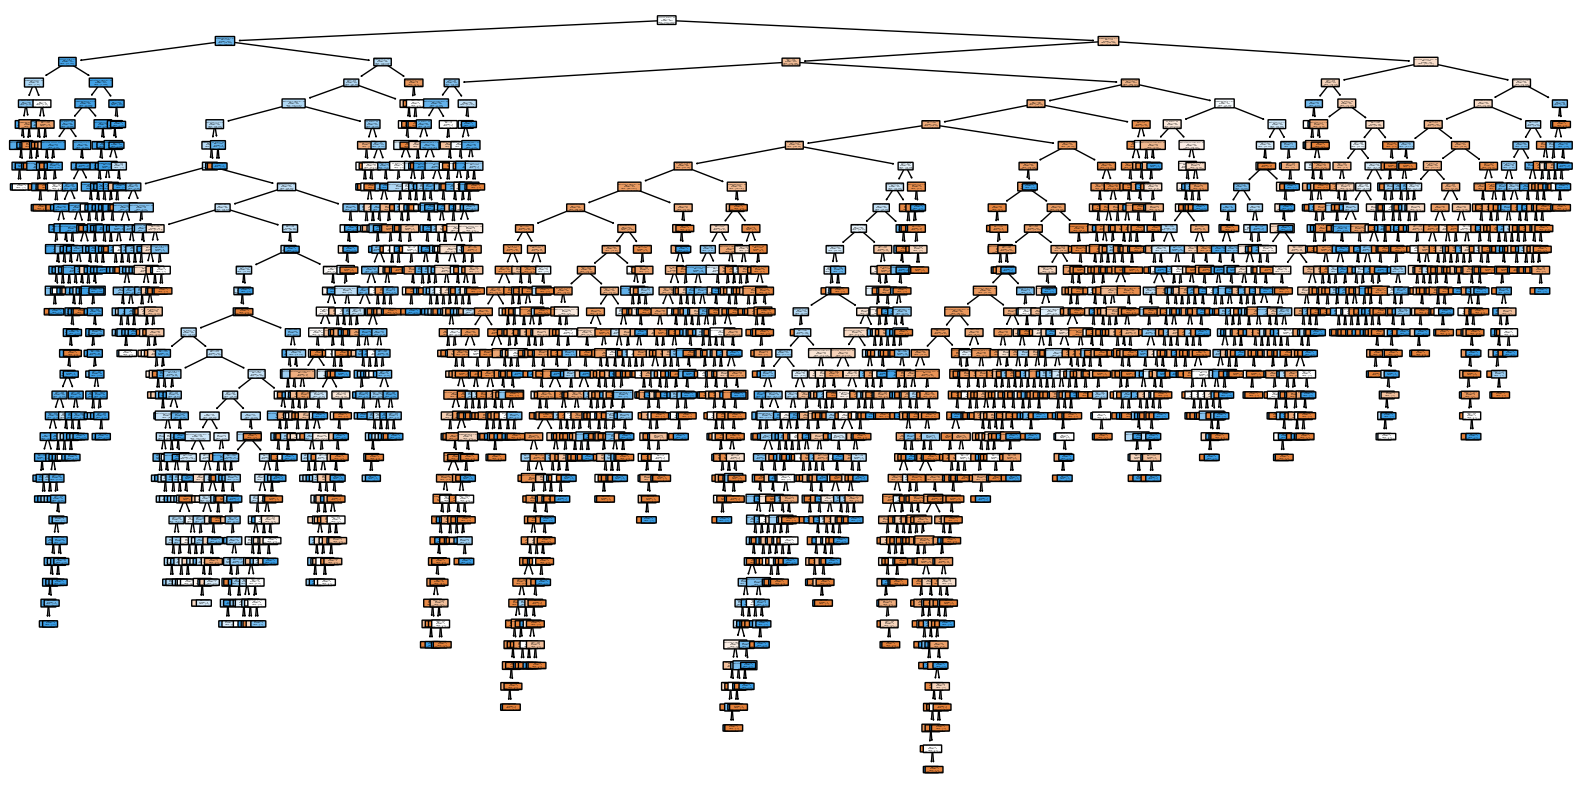

In [9]:
# the following prints a unique tree in our DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

estimator = random_forest_pipeline.named_steps['classifier'].estimators_[0]

plt.figure(figsize=(20,10))
plot_tree(estimator, 
          filled=True, 
          rounded=True,
          class_names=['Not Transported', 'Transported'],
          feature_names=column_order)  # Ensure 'column_order' matches the order of features in the trained model
plt.show()

## AdaBoost Classifier

We extend the pipeline with an AdaBoost classifier to predict the Transported variable. The default model uses the DecisionTreeClassifier with max_depth = 1 as a base model => https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html 

In [10]:
from sklearn.ensemble import AdaBoostClassifier

X = train.drop('Transported', axis=1)
y = train['Transported']

# Define the hyperparameters for the DecisionTreeClassifier
hyperparams = {
    'n_estimators': 50,         # Maximum number of estimators
    'random_state': 42          # Ensures reproducibility of the results
}

# Update the model pipeline with the new DecisionTreeClassifier parameters
adaboost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(**hyperparams))
])

# Fit the model
adaboost_pipeline.fit(X, y)

adaboost_pipeline

/Users/levkiwi/Dev/64-61.1-Data-Science/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Age', 'RoomService',
                                                   'FoodCourt', 'ShoppingMall',
                                                   'Spa', 'VRDeck']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['HomePlanet', 'Destination',
                                                   'VIP', 'CryoSleep'])])),
                ('classifier', AdaBoostClassifier(random_state=42))])

## Gradient Boosting Classifier

We extend the pipeline with a Gradient Boosting classifier to predict the Transported variable.


In [11]:
from sklearn.ensemble import GradientBoostingClassifier

X = train.drop('Transported', axis=1)
y = train['Transported']

# Define the hyperparameters for the DecisionTreeClassifier
hyperparams = {
    'n_estimators': 100,        # Maximum number of estimators
    'random_state': 42          # Ensures reproducibility of the results
}

# Update the model pipeline with the new DecisionTreeClassifier parameters
gradient_boosting_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(**hyperparams))
])

# Fit the model
gradient_boosting_pipeline.fit(X, y)

gradient_boosting_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Age', 'RoomService',
                                                   'FoodCourt', 'ShoppingMall',
                                                   'Spa', 'VRDeck']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['HomePlanet', 'Destination',
                                                   'VIP', 'CryoSleep'])])),
                ('classifier', GradientBoostingClassifier(random_state=42))])

# Evaluation on Kaggle

In [12]:
test = pd.read_csv("Data/test.csv", index_col= "PassengerId")
X_test = test

y_pred_random_forest = random_forest_pipeline.predict(X_test)
#pd.DataFrame(y_pred_random_forest, columns=['Transported'], index=X_test.index).to_csv("Data/random_forest.csv", index=True)

y_pred_adaboost = adaboost_pipeline.predict(X_test)
#pd.DataFrame(y_pred_adaboost, columns=['Transported'], index=X_test.index).to_csv("Data/adaboost.csv", index=True)

y_pred_gradient_boosting = gradient_boosting_pipeline.predict(X_test)
#pd.DataFrame(y_pred_gradient_boosting, columns=['Transported'], index=X_test.index).to_csv("Data/gradient_boosting.csv", index=True)